In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt


In [3]:
df=data = pd.read_csv('Mais_D1.csv')
vect=['Bale','Banwa','Kossi','Mouhoun',	'Nayala',	'Sourou',	'Comoe'	,
      'Leraba',	'Boulgou',	'Koulpelogo',	'Kouritenga',	'Bam'	,'Namentenga',
      'Sanmatenga',	'Boulkiemde',	'Sanguie'	,'Sissili',	'Ziro',	'Bazega',	'Nahouri',
      'Zoundweogo',	'Kadiogo','Gnagna',	'Gourma',	'Komandjoari',	'Kompienga'	,'Tapoa',
      'Houet'	,'Kenedougou',	'Tuy','Loroum',	'Passore',	'Yatenga',	'Zondoma',	'Ganzourgou',
      'Kourweogo',	'Oubritenga',
      'Oudalan','Seno',	'Soum',	'Yagha','Bougouriba',	'Ioba',	'Noumbiel',	'Poni']
len(vect)

45

In [4]:
y=df['year']

In [5]:
y=df.loc[df['province'].isin(['Bougouriba'])]['year']

In [33]:
def correlation(df,level):
    dt=df.loc[df['province'].isin([level])]
    X = dt.iloc[:, 1:40]
    #y = dt.iloc[:, 37]
    X = pd.DataFrame(StandardScaler().fit_transform(X))
    X=X.rename(columns={0:'year', 1:'driver.TSA', 2:'Driver.TNA', 3:'sahel_rainfall', 4:'QBO', 5:'NAO',
       6:'gmsst', 7:'EA', 8:'AMM_sst', 9:'Driver.NTA', 10:'AMO_sst', 11:'Driver.AO', 12:'PDO',
       13:'PRCPTOT', 14:'R10mm', 15:'R1mm', 16:'R20mm', 17:'R5mm', 18:'R95pTOT', 19:'R99pTOT',
       20:'RX1day', 21:'RX5day',22: 'SDII', 23:'CWD', 24:'CDD', 25:'TNn', 26:'TNx', 27:'TXx', 28:'TXn',
       29:'Chirts_Tmax_Temp', 30:'Chirts_Tmin_Temp', 31:'ERA5_Pressure', 32:'ERA5_wins',
       33:'chirps_Prec', 34:'ERA5_soil_moisture', 35:'NDVI',36:'Mais_area',37:'Nino34',38:'mais'})
    #a= pd.DataFrame(pd.DataFrame(dt.corrwith(y, axis = 0)).iloc[:,0])

    a=pd.DataFrame(pd.DataFrame(X.corr()).iloc[:,38])
    a.columns=[level]
    return a

In [34]:
#c=correlation(df,'Banwa')
#c

In [35]:
def sort_corr(df,level):
    c=correlation(df,level)
    #c= c.sort_values(by=['Bougouriba'])
    absolute=c[level].abs()

    b=pd.DataFrame(absolute).sort_values(by=[level],ascending=False)
    df2 = pd.merge(b, c, left_index=True, right_index=True)
    return df2

In [38]:
bbb=sort_corr(df,'Banwa')
bbb=bbb.iloc[0:11:,]
index_list = bbb.index.tolist()

In [46]:
index_list
a=df[index_list]
a.iloc[:,0:13]

,mais,EA,CWD,AMO_sst,Driver.NTA,Driver.TNA,sahel_rainfall,CDD,R1mm,driver.TSA,AMM_sst
0,1645.384171,-0.110000,7,0.031,-0.206667,-0.076667,-1.333333,11,51,0.286667,-1.90
1,180.000000,-0.110000,6,0.031,-0.206667,-0.076667,-1.333333,8,38,0.286667,-1.90
2,1408.793452,-0.110000,9,0.031,-0.206667,-0.076667,-1.333333,8,53,0.286667,-1.90
3,951.000000,-0.110000,4,0.031,-0.206667,-0.076667,-1.333333,8,49,0.286667,-1.90
4,535.000000,-0.110000,7,0.031,-0.206667,-0.076667,-1.333333,10,50,0.286667,-1.90
...,...,...,...,...,...,...,...,...,...,...,...
760,1862.591477,-1.446667,9,0.296,0.296667,0.363333,64.666667,7,63,0.473333,-0.53
761,2670.053306,-1.446667,10,0.296,0.296667,0.363333,64.666667,9,58,0.473333,-0.53
762,1386.397024,-1.446667,9,0.296,0.296667,0.363333,64.666667,12,55,0.473333,-0.53
763,834.129011,-1.446667,7,0.296,0.296667,0.363333,64.666667,9,48,0.473333,-0.53


In [37]:
def table(df,v):
    D=pd.DataFrame()
    for i in range(0,len(v)):
        D=pd.concat([D,correlation(df,v[i])],axis = 1)
    return D

In [47]:
table(df,vect).to_csv('correlation.csv')

In [48]:
#table(df,vect).iloc[:,1:20]


In [49]:
aa=table(df, vect)

<AxesSubplot:>

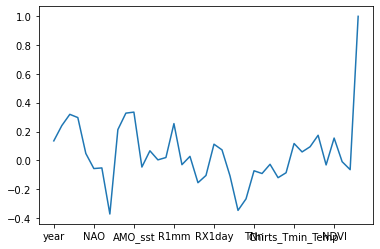

In [51]:
aa['Banwa'].plot()

In [88]:
def figures(df,level):
    dt=df.loc[df['province'].isin([level])]
    X = dt.iloc[:, 1:40]
    #y = dt.iloc[:, 37]
    X = pd.DataFrame(StandardScaler().fit_transform(X))
    X=X.rename(columns={0:'year', 1:'driver.TSA', 2:'Driver.TNA', 3:'sahel_rainfall', 4:'QBO', 5:'NAO',
       6:'gmsst', 7:'EA', 8:'AMM_sst', 9:'Driver.NTA', 10:'AMO_sst', 11:'Driver.AO', 12:'PDO',
       13:'PRCPTOT', 14:'R10mm', 15:'R1mm', 16:'R20mm', 17:'R5mm', 18:'R95pTOT', 19:'R99pTOT',
       20:'RX1day', 21:'RX5day',22: 'SDII', 23:'CWD', 24:'CDD', 25:'TNn', 26:'TNx', 27:'TXx', 28:'TXn',
       29:'Chirts_Tmax_Temp', 30:'Chirts_Tmin_Temp', 31:'ERA5_Pressure', 32:'ERA5_wins',
       33:'chirps_Prec', 34:'ERA5_soil_moisture', 35:'NDVI',36:'Mais_area',37:'Nino34',38:'Mais'})
    #a= pd.DataFrame(pd.DataFrame(dt.corrwith(y, axis = 0)).iloc[:,0])
    PRCPTOT=X['PRCPTOT']
    mais=X['Mais']
    plt.plot(y, PRCPTOT, color='r', label='PRCPTOT')
    plt.plot(y, mais, color='g', label='mais')
    plt.title(level)
    plt.legend()
    plt.savefig(level)

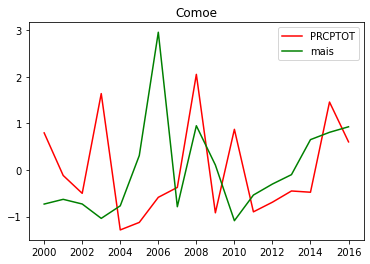

In [89]:
figures(df,'Comoe')

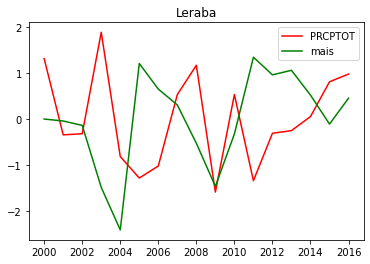

In [90]:
figures(df,'Leraba')

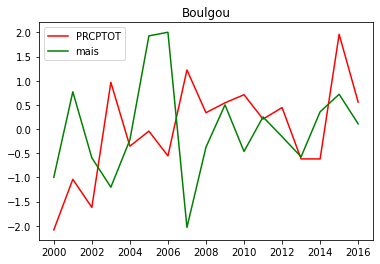

In [91]:
figures(df,'Boulgou')

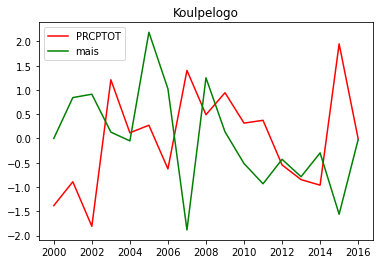

In [92]:
figures(df,'Koulpelogo')

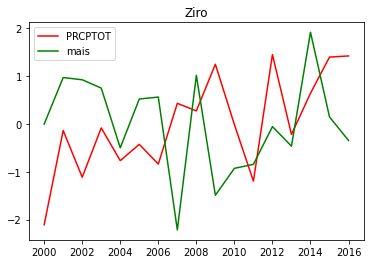

In [93]:
figures(df,'Ziro')

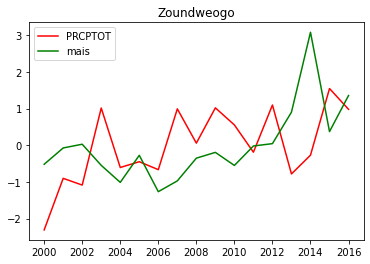

In [94]:
figures(df,'Zoundweogo')

In [99]:
    dt=df.loc[df['province'].isin(['Kadiogo'])]
    X = dt.iloc[:, 1:38]
    X = pd.DataFrame(StandardScaler().fit_transform(X))
    y = dt.iloc[:, 36]
    X=X.rename(columns={0:'year', 1:'driver.TSA', 2:'Driver.TNA', 3:'sahel_rainfall', 4:'QBO', 5:'NAO',
       6:'gmsst', 7:'EA', 8:'AMM_sst', 9:'Driver.NTA', 10:'AMO_sst', 11:'Driver.AO', 12:'PDO',
       13:'PRCPTOT', 14:'R10mm', 15:'R1mm', 16:'R20mm', 17:'R5mm', 18:'R95pTOT', 19:'R99pTOT',
       20:'RX1day', 21:'RX5day',22: 'SDII', 23:'CWD', 24:'CDD', 25:'TNn', 26:'TNx', 27:'TXx', 28:'TXn',
       29:'Chirts_Tmax_Temp', 30:'Chirts_Tmin_Temp', 31:'ERA5_Pressure', 32:'ERA5_wins',
       33:'chirps_Prec', 34:'ERA5_soil_moisture', 35:'NDVI',36:'Sorgh0'})
    X=pd.DataFrame(X)
    a=pd.DataFrame(pd.DataFrame(X.corr()).iloc[:,36])
    a.columns=['Sissili']
    a 

,Sissili
year,0.277167
driver.TSA,-0.234917
Driver.TNA,0.374834
sahel_rainfall,0.440296
QBO,-0.370935
NAO,-0.297762
gmsst,0.304412
EA,-0.582084
AMM_sst,0.380830
Driver.NTA,0.418869


In [65]:
type(X)

pandas.core.frame.DataFrame

In [83]:
X = dt.iloc[:, 1:38]
y = X.iloc[:, 36]
X.corrwith(y, axis = 0)

year                  0.126296
driver.TSA            0.160893
Driver.TNA           -0.147845
sahel_rainfall       -0.277732
QBO                   0.314169
NAO                   0.072941
gmsst                -0.121874
EA                   -0.129789
AMM_sst              -0.207266
Driver.NTA           -0.153189
AMO_sst               0.020600
Driver.AO             0.244880
PDO                  -0.075652
PRCPTOT               0.026850
R10mm                -0.129425
R1mm                 -0.003476
R20mm                -0.071259
R5mm                  0.358099
R95pTOT              -0.218236
R99pTOT               0.208239
RX1day                0.062826
RX5day                0.032505
SDII                  0.041037
CWD                  -0.155332
CDD                  -0.352084
TNn                   0.069980
TNx                  -0.083549
TXx                  -0.095326
TXn                  -0.000582
Chirts_Tmax_Temp      0.178621
Chirts_Tmin_Temp      0.099838
ERA5_Pressure        -0.168275
ERA5_win

In [21]:
b=pd.DataFrame()

In [19]:
dt=df.loc[df['province'].isin(['Nayala'])]
y = dt.iloc[:, 37]
a= pd.DataFrame(pd.DataFrame(dt.corrwith(y, axis = 0)).iloc[:,0])
a.columns=['Nayala']


,Nayala
year,0.018158
driver.TSA,0.125947
Driver.TNA,-0.012952
sahel_rainfall,0.176630
QBO,-0.361031
NAO,-0.068691
gmsst,0.172129
EA,0.050390
AMM_sst,0.028437
Driver.NTA,-0.007770
